<a href="https://colab.research.google.com/github/Abudhagir/3D-Vision/blob/main/MeshCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/drive/MyDrive/3DVSS_Graph
%cd /content/drive/MyDrive/3DVSS_Graph
!git clone https://github.com/vivekmadhavaram/MeshCNN.git


/content/drive/MyDrive/3DVSS_Graph
Cloning into 'MeshCNN'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 232 (delta 6), reused 0 (delta 0), pack-reused 213
Receiving objects: 100% (232/232), 11.65 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [3]:
%cd /content/drive/MyDrive/3DVSS_Graph/MeshCNN
!sh ./scripts/human_seg/get_data.sh


/content/drive/MyDrive/3DVSS_Graph/MeshCNN
downloading the data and putting it in:  datasets
--2023-05-16 10:05:04--  https://www.dropbox.com/s/s3n05sw0zg27fz3/human_seg.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/s3n05sw0zg27fz3/human_seg.tar.gz [following]
--2023-05-16 10:05:04--  https://www.dropbox.com/s/raw/s3n05sw0zg27fz3/human_seg.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84ae35b5cc67a1d3a82d71d139.dl.dropboxusercontent.com/cd/0/inline/B8KlHXrQhzRIpNxdbn-_wrf8vh9puDsZvnqbWuV5Jj8n52Q3-px0lTy3raJd5DD-ekQewVwLND88TAyOr9oBDWYFxZRe0pFnBvmCaJ1ZR9sfB9M2Cfa3sXFNcPomq-cdXkjAExDR50DVsdVd0dpeR_xZHqFqhzUc_KykciboBm6faQ/file# [following]
--2023-05-16 10:05:04--  https://uc84ae35b5cc67a1d3a82d71d139.dl.dropboxuse

In [4]:
!sh ./scripts/human_seg/train.sh

tensorboard X not installed, visualizing wont be available
Traceback (most recent call last):
  File "/content/drive/MyDrive/3DVSS_Graph/MeshCNN/train.py", line 9, in <module>
    opt = TrainOptions().parse()
  File "/content/drive/MyDrive/3DVSS_Graph/MeshCNN/options/base_options.py", line 55, in parse
    torch.cuda.set_device(self.opt.gpu_ids[0])
  File "/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py", line 350, in set_device
    torch._C._cuda_setDevice(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py", line 247, in _lazy_init
    torch._C._cuda_init()
RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx


In [ ]:
!sh ./scripts/human_seg/test.sh

tensorboard X not installed, visualizing wont be available
Running Test
loaded mean / std from cache
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
loading the model from ./checkpoints/human_seg/latest_net.pth
/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
/usr/

In [ ]:
%matplotlib inline

In [ ]:
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import numpy as np

In [ ]:
V = np.array
r2h = lambda x: colors.rgb2hex(tuple(map(lambda y: y / 255., x)))
surface_color = r2h((255, 230, 205))
edge_color = r2h((90, 90, 90))
edge_colors = (r2h((15, 167, 175)), r2h((230, 81, 81)), r2h((142, 105, 252)), r2h((248, 235, 57)),
               r2h((51, 159, 255)), r2h((225, 117, 231)), r2h((97, 243, 185)), r2h((161, 183, 196)))




def init_plot():
    ax = pl.figure().add_subplot(111, projection='3d')
    # hide axis, thank to
    # https://stackoverflow.com/questions/29041326/3d-plot-with-matplotlib-hide-axes-but-keep-axis-labels/
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # Get rid of the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    return (ax, [np.inf, -np.inf, np.inf, -np.inf, np.inf, -np.inf])


def update_lim(mesh, plot):
    vs = mesh[0]
    for i in range(3):
        plot[1][2 * i] = min(plot[1][2 * i], vs[:, i].min())
        plot[1][2 * i + 1] = max(plot[1][2 * i], vs[:, i].max())
    return plot


def update_plot(mesh, plot):
    if plot is None:
        plot = init_plot()
    return update_lim(mesh, plot)


def surfaces(mesh, plot):
    vs, faces, edges = mesh
    vtx = vs[faces]
    edgecolor = edge_color if not len(edges) else 'none'
    tri = a3.art3d.Poly3DCollection(vtx, facecolors=surface_color +'55', edgecolors=edgecolor,
                                    linewidths=.5, linestyles='dashdot')
    plot[0].add_collection3d(tri)
    return plot


def segments(mesh, plot):
    vs, _, edges = mesh
    for edge_c, edge_group in enumerate(edges):
        for edge_idx in edge_group:
            edge = vs[edge_idx]
            line = a3.art3d.Line3DCollection([edge],  linewidths=.5, linestyles='dashdot')
            line.set_color(edge_colors[edge_c % len(edge_colors)])
            plot[0].add_collection3d(line)
    return plot


def plot_mesh(mesh, *whats, show=True, plot=None):
    for what in [update_plot] + list(whats):
        plot = what(mesh, plot)
    if show:
        li = max(plot[1][1], plot[1][3], plot[1][5])
        plot[0].auto_scale_xyz([0, li], [0, li], [0, li])
        pl.tight_layout()
        pl.show()
    return plot


def parse_obje(obj_file, scale_by):
    vs = []
    faces = []
    edges = []

    def add_to_edges():
        if edge_c >= len(edges):
            for _ in range(len(edges), edge_c + 1):
                edges.append([])
        edges[edge_c].append(edge_v)

    def fix_vertices():
        nonlocal vs, scale_by
        vs = V(vs)
        z = vs[:, 2].copy()
        vs[:, 2] = vs[:, 1]
        vs[:, 1] = z
        max_range = 0
        for i in range(3):
            min_value = np.min(vs[:, i])
            max_value = np.max(vs[:, i])
            max_range = max(max_range, max_value - min_value)
            vs[:, i] -= min_value
        if not scale_by:
            scale_by = max_range
        vs /= scale_by

    with open(obj_file) as f:
        for line in f:
            line = line.strip()
            splitted_line = line.split()
            if not splitted_line:
                continue
            elif splitted_line[0] == 'v':
                vs.append([float(v) for v in splitted_line[1:]])
            elif splitted_line[0] == 'f':
                faces.append([int(c) - 1 for c in splitted_line[1:]])
            elif splitted_line[0] == 'e':
                if len(splitted_line) >= 4:
                    edge_v = [int(c) - 1 for c in splitted_line[1:-1]]
                    edge_c = int(splitted_line[-1])
                    add_to_edges()

    vs = V(vs)
    fix_vertices()
    faces = V(faces, dtype=int)
    edges = [V(c, dtype=int) for c in edges]
    return (vs, faces, edges), scale_by


def view_meshes(*files, offset=.2):
    plot = None
    max_x = 0
    scale = 0
    for file in files:
        mesh, scale = parse_obje(file, scale)
        max_x_current = mesh[0][:, 0].max()
        mesh[0][:, 0] += max_x + offset
        plot = plot_mesh(mesh, surfaces, segments, plot=plot, show=file == files[-1])
        max_x += max_x_current + offset

<ipython-input-19-f0443d2cb355>:15: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-19-f0443d2cb355>:16: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-19-f0443d2cb355>:17: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-19-f0443d2cb355>:19: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-19-f0443d2cb355>:20: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and wil

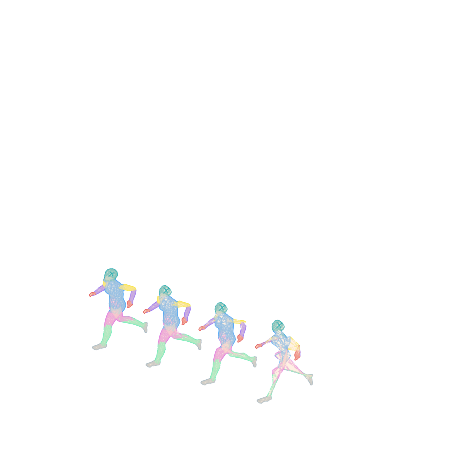

In [ ]:
files = [
         'checkpoints/human_seg/meshes/shrec__4_0.obj',
         'checkpoints/human_seg/meshes/shrec__4_1.obj',
         'checkpoints/human_seg/meshes/shrec__4_2.obj',
         'checkpoints/human_seg/meshes/shrec__4_3.obj',
        #  'checkpoints/human_seg/meshes/shrec__12_0.obj',
]

view_meshes(*files)